In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [53]:
from wordcloud import wordcloud
nltk.download('stopwords')
nltk.download ('Wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Harpreet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading Wordnet: Package 'Wordnet' not found in
[nltk_data]     index


False

In [54]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *


In [55]:
trump = pd.read_csv('hashtag_donaldtrump.csv',lineterminator='\n')
biden = pd.read_csv('hashtag_joebiden.csv',lineterminator='\n')

In [56]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [57]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [58]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [59]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [60]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [61]:
trump['candidate'] = 'Trump'

In [62]:
biden['candidate'] = 'Biden'

In [63]:
trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,1.325589e+18,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3.427951e+09,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit »den Falsche...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.036006,Trump
970915,2020-11-08 23:59:48,1.325589e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3.245258e+09,ahzy,ahhhzy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.715870,Trump
970916,2020-11-08 23:59:53,1.325589e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,9.866108e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,...,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.975868,Trump
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump


In [64]:
data = pd.concat([trump,biden])

In [65]:
data.shape

(1747805, 22)

In [66]:
data.sort_values(by='created_at')

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,Trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,Trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,Biden


<AxesSubplot:xlabel='candidate'>

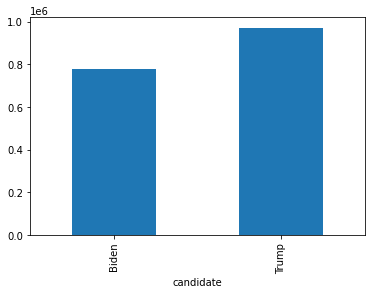

In [67]:
### can you find number of tweets received for each of them
data.groupby('candidate')['tweet'].count().plot.bar()

<AxesSubplot:xlabel='candidate'>

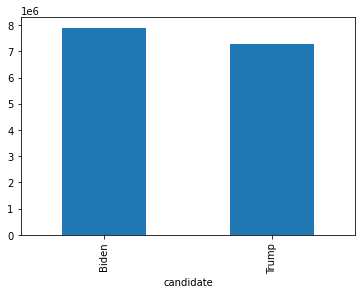

In [68]:
## comparison plot of likes
data.groupby('candidate')['likes'].sum().plot.bar()

In [69]:
data.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

In [70]:
data['country'] = data['country'].replace({'United States of America':"US",'United States':"US"})

In [71]:
data.country.value_counts()

US                          394400
United Kingdom               58051
India                        40091
Germany                      35379
France                       35299
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 188, dtype: int64

In [72]:
### tweets for biden and trump from each country(
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [73]:
top10countries

['US',
 'United Kingdom',
 'India',
 'Germany',
 'France',
 'Canada',
 'Italy',
 'Australia',
 'Mexico',
 'Turkey']

In [74]:
tweet_df = data.groupby(['country','candidate'])['tweet'].count().reset_index()

In [75]:
tweet_df

,country,candidate,tweet
0,Afghanistan,Biden,119
1,Afghanistan,Trump,101
2,Albania,Biden,61
3,Albania,Trump,74
4,Algeria,Biden,24
...,...,...,...
363,Yemen,Trump,93
364,Zambia,Biden,33
365,Zambia,Trump,38
366,Zimbabwe,Biden,59


In [76]:
tweet_df = tweet_df[tweet_df['country'].isin(top10countries)]
tweet_df

,country,candidate,tweet
16,Australia,Biden,5534
17,Australia,Trump,9365
54,Canada,Biden,10809
55,Canada,Trump,16996
112,France,Biden,14610
113,France,Trump,20689
118,Germany,Biden,12761
119,Germany,Trump,22618
146,India,Biden,21532
147,India,Trump,18559


<AxesSubplot:xlabel='country', ylabel='tweet'>

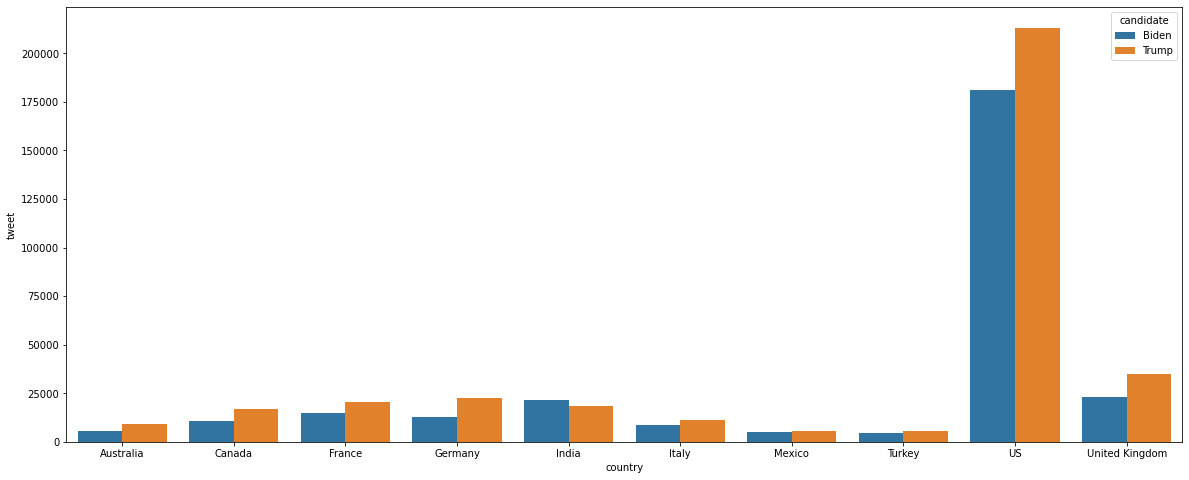

In [77]:
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='candidate')

## Sentiment Analysis



In [78]:

lm=WordNetLemmatizer()


In [79]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [80]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [81]:
def getAnalysis(score):
    if score<0 :
        return 'negative'
    elif score ==0:
        return 'neutral'
    else:
        return 'positive'

## DONALD TRUMP TWEET SENTIMENT ANALYSIS

In [82]:
trump_tweets = data[data['candidate']=='Trump']

In [83]:
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']

In [84]:
trump_tweets= trump_tweets[['tweet']]

In [94]:
trump_tweets

,tweet,cleantext,subjectivity,polarity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000,positive
...,...,...,...,...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...,donaldjtrumpjr trump intimately familiar disgu...,0.750000,-0.312500,negative
970895,Have you know decency #Trump @GOP? Do you kno...,know decency trump gop know like child die bil...,0.700000,-0.600000,negative
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,lionz den present white obama get ready live f...,0.371429,-0.021753,negative
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,trump patriot maga http co fnm ux,0.000000,0.000000,neutral


In [95]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/Harpreet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

In [97]:
trump_tweets

,tweet,cleantext,subjectivity,polarity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000,positive
...,...,...,...,...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...,donaldjtrumpjr trump intimately familiar disgu...,0.750000,-0.312500,negative
970895,Have you know decency #Trump @GOP? Do you kno...,know decency trump gop know like child die bil...,0.700000,-0.600000,negative
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,lionz den present white obama get ready live f...,0.371429,-0.021753,negative
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,trump patriot maga http co fnm ux,0.000000,0.000000,neutral


In [98]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [99]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [100]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)

In [108]:
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000,positive


Text(0, 0.5, '%of Tweets')

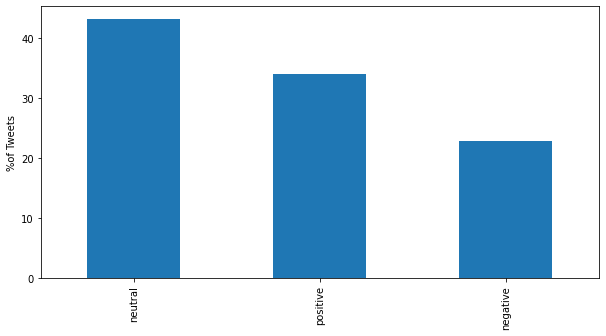

In [118]:
plt.figure(figsize=(10,5))
(trump_tweets.analysis.value_counts(normalize= True)*100).plot.bar()
plt.ylabel("%of Tweets")

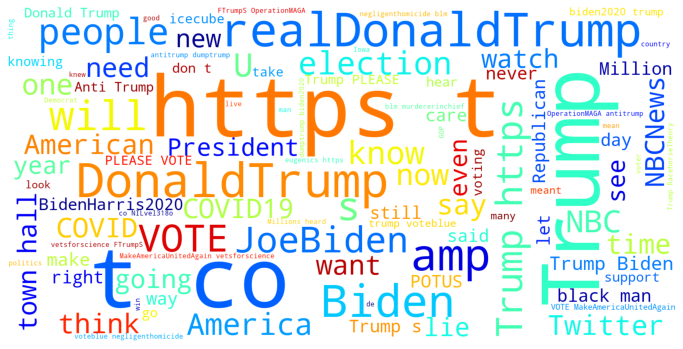

In [103]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,width=1600,
                         height=800,max_words=100,max_font_size=200,colormap='jet').generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(trump_tweets['tweet'][:5000])

In [104]:
biden_tweets = data[data['candidate']=='Biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets= biden_tweets[['tweet']]

In [105]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)

In [119]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)

In [120]:
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)

In [121]:
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)

Text(0, 0.5, '%age of tweets')

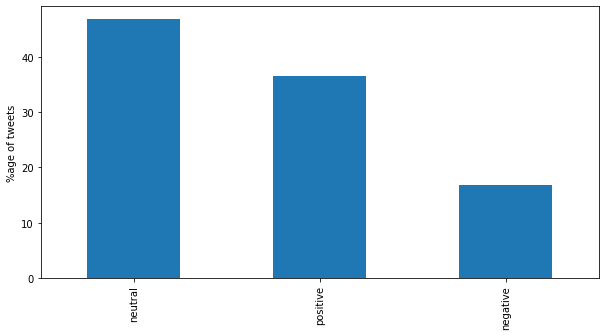

In [122]:
plt.figure(figsize=(10,5))
(biden_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")

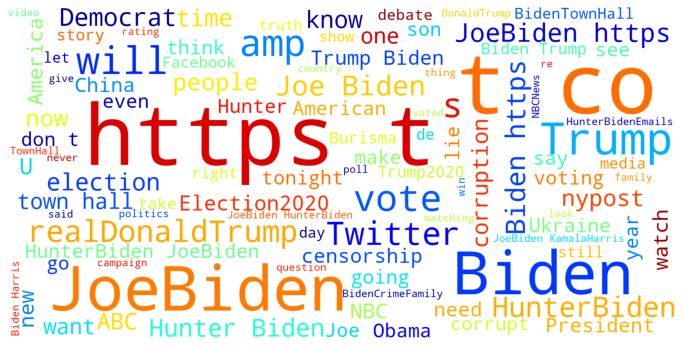

In [123]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,width=1600,
                         height=800,max_words=100,max_font_size=200,colormap='jet').generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(biden_tweets['tweet'][:5000])

In [124]:
trump_tweets.analysis.value_counts()

neutral     92097
positive    72568
negative    48598
Name: analysis, dtype: int64

In [125]:
biden_tweets.analysis.value_counts()

neutral     84721
positive    66093
negative    30323
Name: analysis, dtype: int64

In [126]:
lst = ['215657' ,'127515' ,'212692' ,'258572' ,'101224' ,'215640' ,'184096' ,'167857' ,'215638' ,'217806' ,'182105' ,'182103' ,'182107' ,'202895' ,'259306' ,'598110' ,'217695' ,'251823' ,'559448' ,'171602' ,'509704' ,'182094' ,'114898' ,'542253' ,'184392' ,'203487' ,'182091' ,'620683' ,'215639' ,'215636' ,'155906' ,'215635' ,'103387' ,'582944' ,'603548' ,'173632' ,'173631' ,'595987' ,'629338' ,'531706' ,'507673' ,'597485' ,'440828' ,'440833' ,'424429' ,'212851' ,'593340' ,'103387' ,'107832' ,'156259' ,'146995' ,'156257' ,'212849' ,'185282' ,'162059' ,'212848' ,'171602' ,'201723' ,'432311' ,'201722' ,'131139' ,'131141' ,'431864' ,'517335' ,'128264' ,'201720' ,'201721' ,'232762' ,'142975' ,'557208' ,'148888' ,'517336' ,'570052' ,'541840' ,'555378' ,'145239' ,'207277' ,'209665' ,'145927' ,'117841' ,'182782' ,'119871' ,'164168' ,'585104' ,'557209' ,'213248' ,'207440' ,'185462' ,'147645' ,'615206' ,'192925' ,'143429' ,'131138' ,'196742' ,'556182' ,'627275' ,'131982' ,'117825' ,'556181' ,'622290' ,'117807' ,'556183' ,'294345' ,'627786' ,'347434' ,'190760' ,'117805' ,'347433' ,'622291' ,'151604' ,'622292' ,'185285' ,'210388' ,'117806' ,'185818' ,'162059' ,'210398' ,'184452' ,'210436' ,'185812' ,'215747' ,'196743' ,'204587' ,'182426' ,'185462' ,'210425' ,'190461' ,'186003' ,'178090' ,'182422' ,'179774' ,'185816' ,'185813' ,'204585' ,'163837' ,'310476' ,'185054' ,'150097' ,'204586' ,'184996' ,'185817' ,'190462' ,'185811' ,'185056' ,'605027' ,'193899' ,'190463' ,'164281' ,'990101' ,'151606' ,'185810']
len(lst)

151